In [2]:
import keras


Using TensorFlow backend.


In [31]:

import pandas as pd
import os
from  pathlib import Path
train_file=r"zhengqi_train.txt"
test_file=r"zhengqi_test.txt"
data_dir=r"D:\project\tianchi\steam_prodict"
"""Path(data_dir,train_file)"""
table= pd.read_table(Path(data_dir,train_file)).iloc[:,:38]

table.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028


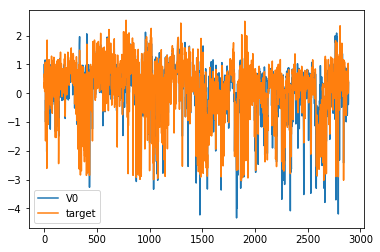

In [7]:
%matplotlib inline
v0_tar=table[["V0","target"]]
v0_tar.head()
v0_tar.plot()

# 模型

In [10]:
model = keras.Sequential() #线性核

In [11]:
from keras import layers
model.add(layers.Dense(1,input_dim=38))

Instructions for updating:
Colocations handled automatically by placer.


# 训练

In [18]:
model.summary()
model.compile(optimizer='adam',
             loss='mse') #优化函数, mse 方差
x=v0_tar.index
y=v0_tar[["V0"]]
model.fit(x,y,epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2888/2888 [==============================] - 1s 227us/step - loss: 2159508.3819
Epoch 2/100
2888/2888 [==============================] - 0s 40us/step - loss: 1755946.5405
Epoch 3/100
2888/2888 [==============================] - 0s 39us/step - loss: 1412127.3400
Epoch 4/100
2888/2888 [==============================] - 0s 38us/step - loss: 1123304.0019
Epoch 5/100
2888/2888 [==============================] - 0s 40us/step - loss: 882135.2952
Epoch 6/100
2888/2888 [==============================] - 0s 29us/step - loss: 683070.9254
Epoch 7/100
2888/2888 [==============================] - 0s 37us/step - loss: 520876.7387
Epoch 8/100
2888/2888 [==================

# 预测

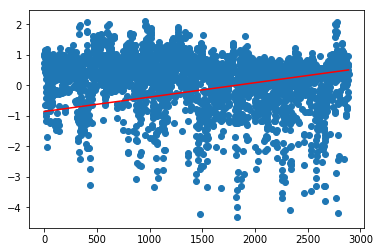

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

plt.plot(x,model.predict(x),color="red")

# 一元回归

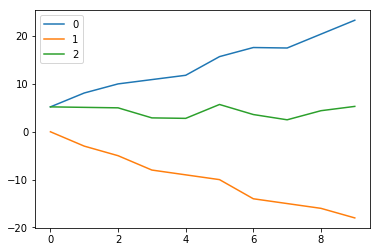

In [71]:
import numpy as np
import random
import pandas as pd
#原函数
x=np.arange(1,11,1,dtype=int)
y=1.9*x+3.3
y=list ( map( lambda n:n+random.randint(-1,1),y))
#加噪声
y2=-2*x+1
y2=list ( map( lambda n:n+random.randint(-1,1),y2))
yout=np.add(y,y2)
table=pd.DataFrame({0:y,1:y2,2:yout})
table.plot()

In [70]:
from keras import layers
import keras
model = keras.Sequential() #线性核
model.add(layers.Dense(1,input_dim=1))
model.compile(optimizer='adam',
             loss='mse') #优化函数, mse 方差
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:

model.fit(x,y,epochs=2000)

Epoch 1/2000
9/9 [==============================] - 0s 221us/step - loss: 2.3087
Epoch 2/2000
9/9 [==============================] - 0s 111us/step - loss: 2.3079
Epoch 3/2000
9/9 [==============================] - 0s 222us/step - loss: 2.3071
Epoch 4/2000
9/9 [==============================] - 0s 111us/step - loss: 2.3063
Epoch 5/2000
9/9 [==============================] - 0s 222us/step - loss: 2.3055
Epoch 6/2000
9/9 [==============================] - 0s 222us/step - loss: 2.3048
Epoch 7/2000
9/9 [==============================] - 0s 111us/step - loss: 2.3040
Epoch 8/2000
9/9 [==============================] - 0s 222us/step - loss: 2.3032
Epoch 9/2000
9/9 [==============================] - 0s 222us/step - loss: 2.3024
Epoch 10/2000
9/9 [==============================] - 0s 111us/step - loss: 2.3017
Epoch 11/2000
9/9 [==============================] - 0s 222us/step - loss: 2.3009
Epoch 12/2000
9/9 [==============================] - 0s 111us/step - loss: 2.3002
Epoch 13/2000
9/9 [======

9/9 [==============================] - 0s 222us/step - loss: 2.2413
Epoch 102/2000
9/9 [==============================] - 0s 111us/step - loss: 2.2408
Epoch 103/2000
9/9 [==============================] - 0s 222us/step - loss: 2.2402
Epoch 104/2000
9/9 [==============================] - 0s 222us/step - loss: 2.2396
Epoch 105/2000
9/9 [==============================] - 0s 222us/step - loss: 2.2390
Epoch 106/2000
9/9 [==============================] - 0s 111us/step - loss: 2.2385
Epoch 107/2000
9/9 [==============================] - 0s 111us/step - loss: 2.2379
Epoch 108/2000
9/9 [==============================] - 0s 222us/step - loss: 2.2373
Epoch 109/2000
9/9 [==============================] - 0s 222us/step - loss: 2.2368
Epoch 110/2000
9/9 [==============================] - 0s 111us/step - loss: 2.2362
Epoch 111/2000
9/9 [==============================] - 0s 222us/step - loss: 2.2356
Epoch 112/2000
9/9 [==============================] - 0s 111us/step - loss: 2.2351
Epoch 113/2000
9/9 

Epoch 200/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1908
Epoch 201/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1904
Epoch 202/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1899
Epoch 203/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1895
Epoch 204/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1890
Epoch 205/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1886
Epoch 206/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1881
Epoch 207/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1877
Epoch 208/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1872
Epoch 209/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1868
Epoch 210/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1863
Epoch 211/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1859
Epoc

Epoch 299/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1493
Epoch 300/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1489
Epoch 301/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1486
Epoch 302/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1482
Epoch 303/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1478
Epoch 304/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1474
Epoch 305/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1470
Epoch 306/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1466
Epoch 307/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1462
Epoch 308/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1458
Epoch 309/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1455
Epoch 310/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1451
Epoc

Epoch 398/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1124
Epoch 399/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1121
Epoch 400/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1117
Epoch 401/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1113
Epoch 402/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1110
Epoch 403/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1106
Epoch 404/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1103
Epoch 405/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1099
Epoch 406/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1095
Epoch 407/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1092
Epoch 408/2000
9/9 [==============================] - 0s 111us/step - loss: 2.1088
Epoch 409/2000
9/9 [==============================] - 0s 222us/step - loss: 2.1085
Epoc

Epoch 497/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0775
Epoch 498/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0771
Epoch 499/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0768
Epoch 500/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0764
Epoch 501/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0761
Epoch 502/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0757
Epoch 503/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0754
Epoch 504/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0750
Epoch 505/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0747
Epoch 506/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0743
Epoch 507/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0740
Epoch 508/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0736
Epoc

Epoch 596/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0430
Epoch 597/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0427
Epoch 598/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0423
Epoch 599/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0420
Epoch 600/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0416
Epoch 601/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0413
Epoch 602/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0409
Epoch 603/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0406
Epoch 604/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0402
Epoch 605/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0399
Epoch 606/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0395
Epoch 607/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0392
Epoc

Epoch 695/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0083
Epoch 696/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0080
Epoch 697/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0076
Epoch 698/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0072
Epoch 699/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0069
Epoch 700/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0065
Epoch 701/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0062
Epoch 702/2000
9/9 [==============================] - 0s 222us/step - loss: 2.0058
Epoch 703/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0055
Epoch 704/2000
9/9 [==============================] - 0s 223us/step - loss: 2.0051
Epoch 705/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0048
Epoch 706/2000
9/9 [==============================] - 0s 111us/step - loss: 2.0044
Epoc

Epoch 794/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9729
Epoch 795/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9726
Epoch 796/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9722
Epoch 797/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9719
Epoch 798/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9715
Epoch 799/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9711
Epoch 800/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9708
Epoch 801/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9704
Epoch 802/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9701
Epoch 803/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9697
Epoch 804/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9693
Epoch 805/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9690
Epoc

Epoch 893/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9368
Epoch 894/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9364
Epoch 895/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9360
Epoch 896/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9357
Epoch 897/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9353
Epoch 898/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9349
Epoch 899/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9346
Epoch 900/2000
9/9 [==============================] - 0s 222us/step - loss: 1.9342
Epoch 901/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9338
Epoch 902/2000
9/9 [==============================] - 0s 221us/step - loss: 1.9335
Epoch 903/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9331
Epoch 904/2000
9/9 [==============================] - 0s 111us/step - loss: 1.9327
Epoc

Epoch 992/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8998
Epoch 993/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8994
Epoch 994/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8990
Epoch 995/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8986
Epoch 996/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8983
Epoch 997/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8979
Epoch 998/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8975
Epoch 999/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8971
Epoch 1000/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8968
Epoch 1001/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8964
Epoch 1002/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8960
Epoch 1003/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8956


Epoch 1090/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8623
Epoch 1091/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8619
Epoch 1092/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8616
Epoch 1093/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8612
Epoch 1094/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8608
Epoch 1095/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8604
Epoch 1096/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8600
Epoch 1097/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8596
Epoch 1098/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8592
Epoch 1099/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8589
Epoch 1100/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8585
Epoch 1101/2000
9/9 [==============================] - 0s 223us/step - loss:

Epoch 1188/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8241
Epoch 1189/2000
9/9 [==============================] - 0s 112us/step - loss: 1.8237
Epoch 1190/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8233
Epoch 1191/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8229
Epoch 1192/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8225
Epoch 1193/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8221
Epoch 1194/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8217
Epoch 1195/2000
9/9 [==============================] - 0s 222us/step - loss: 1.8213
Epoch 1196/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8209
Epoch 1197/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8206
Epoch 1198/2000
9/9 [==============================] - 0s 111us/step - loss: 1.8202
Epoch 1199/2000
9/9 [==============================] - 0s 111us/step - loss:

Epoch 1286/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7852
Epoch 1287/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7847
Epoch 1288/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7843
Epoch 1289/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7839
Epoch 1290/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7835
Epoch 1291/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7831
Epoch 1292/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7827
Epoch 1293/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7823
Epoch 1294/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7819
Epoch 1295/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7815
Epoch 1296/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7811
Epoch 1297/2000
9/9 [==============================] - 0s 111us/step - loss:

Epoch 1384/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7455
Epoch 1385/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7451
Epoch 1386/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7447
Epoch 1387/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7443
Epoch 1388/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7439
Epoch 1389/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7435
Epoch 1390/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7431
Epoch 1391/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7427
Epoch 1392/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7423
Epoch 1393/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7419
Epoch 1394/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7415
Epoch 1395/2000
9/9 [==============================] - 0s 222us/step - loss:

Epoch 1482/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7053
Epoch 1483/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7049
Epoch 1484/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7045
Epoch 1485/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7041
Epoch 1486/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7037
Epoch 1487/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7033
Epoch 1488/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7029
Epoch 1489/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7024
Epoch 1490/2000
9/9 [==============================] - 0s 221us/step - loss: 1.7020
Epoch 1491/2000
9/9 [==============================] - 0s 111us/step - loss: 1.7016
Epoch 1492/2000
9/9 [==============================] - 0s 222us/step - loss: 1.7012
Epoch 1493/2000
9/9 [==============================] - 0s 222us/step - loss:

Epoch 1580/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6646
Epoch 1581/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6642
Epoch 1582/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6638
Epoch 1583/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6633
Epoch 1584/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6629
Epoch 1585/2000
9/9 [==============================] - 0s 111us/step - loss: 1.6625
Epoch 1586/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6621
Epoch 1587/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6617
Epoch 1588/2000
9/9 [==============================] - 0s 111us/step - loss: 1.6613
Epoch 1589/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6608
Epoch 1590/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6604
Epoch 1591/2000
9/9 [==============================] - 0s 111us/step - loss:

Epoch 1678/2000
9/9 [==============================] - 0s 111us/step - loss: 1.6234
Epoch 1679/2000
9/9 [==============================] - 0s 111us/step - loss: 1.6230
Epoch 1680/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6226
Epoch 1681/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6222
Epoch 1682/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6217
Epoch 1683/2000
9/9 [==============================] - 0s 111us/step - loss: 1.6213
Epoch 1684/2000
9/9 [==============================] - 0s 333us/step - loss: 1.6209
Epoch 1685/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6205
Epoch 1686/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6200
Epoch 1687/2000
9/9 [==============================] - 0s 111us/step - loss: 1.6196
Epoch 1688/2000
9/9 [==============================] - 0s 222us/step - loss: 1.6192
Epoch 1689/2000
9/9 [==============================] - 0s 112us/step - loss:

Epoch 1776/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5819
Epoch 1777/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5815
Epoch 1778/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5810
Epoch 1779/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5806
Epoch 1780/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5802
Epoch 1781/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5798
Epoch 1782/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5793
Epoch 1783/2000
9/9 [==============================] - 0s 222us/step - loss: 1.5789
Epoch 1784/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5785
Epoch 1785/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5781
Epoch 1786/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5776
Epoch 1787/2000
9/9 [==============================] - 0s 111us/step - loss:

Epoch 1874/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5401
Epoch 1875/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5396
Epoch 1876/2000
9/9 [==============================] - 0s 222us/step - loss: 1.5392
Epoch 1877/2000
9/9 [==============================] - 0s 222us/step - loss: 1.5388
Epoch 1878/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5384
Epoch 1879/2000
9/9 [==============================] - 0s 222us/step - loss: 1.5379
Epoch 1880/2000
9/9 [==============================] - 0s 112us/step - loss: 1.5375
Epoch 1881/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5371
Epoch 1882/2000
9/9 [==============================] - 0s 111us/step - loss: 1.5366
Epoch 1883/2000
9/9 [==============================] - 0s 222us/step - loss: 1.5362
Epoch 1884/2000
9/9 [==============================] - 0s 222us/step - loss: 1.5358
Epoch 1885/2000
9/9 [==============================] - 0s 111us/step - loss:

Epoch 1972/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4981
Epoch 1973/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4976
Epoch 1974/2000
9/9 [==============================] - 0s 222us/step - loss: 1.4972
Epoch 1975/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4968
Epoch 1976/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4963
Epoch 1977/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4959
Epoch 1978/2000
9/9 [==============================] - 0s 222us/step - loss: 1.4955
Epoch 1979/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4950
Epoch 1980/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4946
Epoch 1981/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4942
Epoch 1982/2000
9/9 [==============================] - 0s 111us/step - loss: 1.4938
Epoch 1983/2000
9/9 [==============================] - 0s 111us/step - loss:

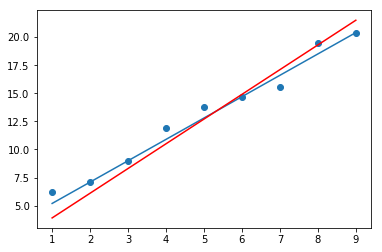

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
plt.plot(x,1.9*x+3.3)
plt.plot(x,model.predict(x),color="red")

In [83]:
#二元线性回归
model = keras.Sequential() #线性核
model.add(layers.Dense(1,input_dim=2))
model.compile(optimizer='adam',
             loss='mse') #优化函数, mse 方差
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [97]:
xin=np.array([y,y2])
xin.shape
xin=xin.reshape(10,2)
xin
# tmp=np.random.random((1000, 100))
# len(tmp)

array([[  5.2,   8.1],
       [ 10. ,  10.9],
       [ 11.8,  15.7],
       [ 17.6,  17.5],
       [ 20.4,  23.3],
       [  0. ,  -3. ],
       [ -5. ,  -8. ],
       [ -9. , -10. ],
       [-14. , -15. ],
       [-16. , -18. ]])

In [108]:
model.fit(xin,yout,epochs=2000,batch_size=5)

Epoch 1/2000
10/10 [==============================] - 0s 698us/step - loss: 8.6934
Epoch 2/2000
10/10 [==============================] - 0s 499us/step - loss: 8.6861
Epoch 3/2000
10/10 [==============================] - 0s 600us/step - loss: 8.6777
Epoch 4/2000
10/10 [==============================] - 0s 501us/step - loss: 8.6707
Epoch 5/2000
10/10 [==============================] - 0s 600us/step - loss: 8.6620
Epoch 6/2000
10/10 [==============================] - 0s 500us/step - loss: 8.6551
Epoch 7/2000
10/10 [==============================] - 0s 500us/step - loss: 8.6480
Epoch 8/2000
10/10 [==============================] - 0s 500us/step - loss: 8.6396
Epoch 9/2000
10/10 [==============================] - 0s 500us/step - loss: 8.6313
Epoch 10/2000
10/10 [==============================] - 0s 500us/step - loss: 8.6237
Epoch 11/2000
10/10 [==============================] - 0s 700us/step - loss: 8.6158
Epoch 12/2000
10/10 [==============================] - 0s 600us/step - loss: 8.6076
E

10/10 [==============================] - 0s 400us/step - loss: 7.9579
Epoch 99/2000
10/10 [==============================] - 0s 500us/step - loss: 7.9515
Epoch 100/2000
10/10 [==============================] - 0s 300us/step - loss: 7.9429
Epoch 101/2000
10/10 [==============================] - 0s 400us/step - loss: 7.9359
Epoch 102/2000
10/10 [==============================] - 0s 500us/step - loss: 7.9281
Epoch 103/2000
10/10 [==============================] - 0s 400us/step - loss: 7.9225
Epoch 104/2000
10/10 [==============================] - 0s 400us/step - loss: 7.9140
Epoch 105/2000
10/10 [==============================] - 0s 300us/step - loss: 7.9061
Epoch 106/2000
10/10 [==============================] - 0s 400us/step - loss: 7.8984
Epoch 107/2000
10/10 [==============================] - 0s 300us/step - loss: 7.8914
Epoch 108/2000
10/10 [==============================] - 0s 500us/step - loss: 7.8843
Epoch 109/2000
10/10 [==============================] - 0s 300us/step - loss: 7.8

10/10 [==============================] - 0s 400us/step - loss: 7.2685
Epoch 195/2000
10/10 [==============================] - 0s 400us/step - loss: 7.2638
Epoch 196/2000
10/10 [==============================] - 0s 400us/step - loss: 7.2546
Epoch 197/2000
10/10 [==============================] - 0s 300us/step - loss: 7.2481
Epoch 198/2000
10/10 [==============================] - 0s 500us/step - loss: 7.2415
Epoch 199/2000
10/10 [==============================] - 0s 300us/step - loss: 7.2344
Epoch 200/2000
10/10 [==============================] - 0s 300us/step - loss: 7.2275
Epoch 201/2000
10/10 [==============================] - 0s 400us/step - loss: 7.2202
Epoch 202/2000
10/10 [==============================] - 0s 401us/step - loss: 7.2128
Epoch 203/2000
10/10 [==============================] - 0s 400us/step - loss: 7.2070
Epoch 204/2000
10/10 [==============================] - 0s 300us/step - loss: 7.1983
Epoch 205/2000
10/10 [==============================] - 0s 600us/step - loss: 7.

10/10 [==============================] - 0s 500us/step - loss: 6.6193
Epoch 291/2000
10/10 [==============================] - 0s 400us/step - loss: 6.6135
Epoch 292/2000
10/10 [==============================] - 0s 400us/step - loss: 6.6064
Epoch 293/2000
10/10 [==============================] - 0s 400us/step - loss: 6.6001
Epoch 294/2000
10/10 [==============================] - 0s 400us/step - loss: 6.5936
Epoch 295/2000
10/10 [==============================] - 0s 500us/step - loss: 6.5871
Epoch 296/2000
10/10 [==============================] - 0s 300us/step - loss: 6.5808
Epoch 297/2000
10/10 [==============================] - 0s 300us/step - loss: 6.5736
Epoch 298/2000
10/10 [==============================] - 0s 300us/step - loss: 6.5688
Epoch 299/2000
10/10 [==============================] - 0s 300us/step - loss: 6.5611
Epoch 300/2000
10/10 [==============================] - 0s 399us/step - loss: 6.5549
Epoch 301/2000
10/10 [==============================] - 0s 400us/step - loss: 6.

10/10 [==============================] - 0s 500us/step - loss: 6.0128
Epoch 387/2000
10/10 [==============================] - 0s 500us/step - loss: 6.0047
Epoch 388/2000
10/10 [==============================] - 0s 500us/step - loss: 5.9992
Epoch 389/2000
10/10 [==============================] - 0s 400us/step - loss: 5.9938
Epoch 390/2000
10/10 [==============================] - 0s 300us/step - loss: 5.9871
Epoch 391/2000
10/10 [==============================] - 0s 500us/step - loss: 5.9808
Epoch 392/2000
10/10 [==============================] - 0s 400us/step - loss: 5.9750
Epoch 393/2000
10/10 [==============================] - 0s 400us/step - loss: 5.9693
Epoch 394/2000
10/10 [==============================] - 0s 500us/step - loss: 5.9631
Epoch 395/2000
10/10 [==============================] - 0s 500us/step - loss: 5.9565
Epoch 396/2000
10/10 [==============================] - 0s 400us/step - loss: 5.9521
Epoch 397/2000
10/10 [==============================] - 0s 500us/step - loss: 5.

10/10 [==============================] - 0s 300us/step - loss: 5.4461
Epoch 483/2000
10/10 [==============================] - 0s 400us/step - loss: 5.4394
Epoch 484/2000
10/10 [==============================] - 0s 301us/step - loss: 5.4334
Epoch 485/2000
10/10 [==============================] - 0s 500us/step - loss: 5.4282
Epoch 486/2000
10/10 [==============================] - 0s 300us/step - loss: 5.4230
Epoch 487/2000
10/10 [==============================] - 0s 400us/step - loss: 5.4167
Epoch 488/2000
10/10 [==============================] - 0s 502us/step - loss: 5.4109
Epoch 489/2000
10/10 [==============================] - 0s 500us/step - loss: 5.4057
Epoch 490/2000
10/10 [==============================] - 0s 300us/step - loss: 5.3998
Epoch 491/2000
10/10 [==============================] - 0s 500us/step - loss: 5.3941
Epoch 492/2000
10/10 [==============================] - 0s 400us/step - loss: 5.3885
Epoch 493/2000
10/10 [==============================] - 0s 400us/step - loss: 5.

10/10 [==============================] - 0s 400us/step - loss: 4.9204
Epoch 579/2000
10/10 [==============================] - 0s 300us/step - loss: 4.9154
Epoch 580/2000
10/10 [==============================] - 0s 400us/step - loss: 4.9104
Epoch 581/2000
10/10 [==============================] - 0s 300us/step - loss: 4.9057
Epoch 582/2000
10/10 [==============================] - 0s 400us/step - loss: 4.9007
Epoch 583/2000
10/10 [==============================] - 0s 400us/step - loss: 4.8945
Epoch 584/2000
10/10 [==============================] - 0s 300us/step - loss: 4.8894
Epoch 585/2000
10/10 [==============================] - 0s 400us/step - loss: 4.8839
Epoch 586/2000
10/10 [==============================] - 0s 400us/step - loss: 4.8785
Epoch 587/2000
10/10 [==============================] - 0s 400us/step - loss: 4.8737
Epoch 588/2000
10/10 [==============================] - 0s 400us/step - loss: 4.8686
Epoch 589/2000
10/10 [==============================] - 0s 400us/step - loss: 4.

10/10 [==============================] - 0s 300us/step - loss: 4.4383
Epoch 675/2000
10/10 [==============================] - 0s 500us/step - loss: 4.4335
Epoch 676/2000
10/10 [==============================] - 0s 500us/step - loss: 4.4288
Epoch 677/2000
10/10 [==============================] - 0s 500us/step - loss: 4.4242
Epoch 678/2000
10/10 [==============================] - 0s 500us/step - loss: 4.4189
Epoch 679/2000
10/10 [==============================] - 0s 400us/step - loss: 4.4141
Epoch 680/2000
10/10 [==============================] - 0s 400us/step - loss: 4.4100
Epoch 681/2000
10/10 [==============================] - 0s 400us/step - loss: 4.4056
Epoch 682/2000
10/10 [==============================] - 0s 400us/step - loss: 4.4001
Epoch 683/2000
10/10 [==============================] - 0s 400us/step - loss: 4.3959
Epoch 684/2000
10/10 [==============================] - 0s 400us/step - loss: 4.3904
Epoch 685/2000
10/10 [==============================] - 0s 300us/step - loss: 4.

10/10 [==============================] - 0s 400us/step - loss: 3.9973
Epoch 771/2000
10/10 [==============================] - 0s 400us/step - loss: 3.9925
Epoch 772/2000
10/10 [==============================] - 0s 300us/step - loss: 3.9880
Epoch 773/2000
10/10 [==============================] - 0s 300us/step - loss: 3.9841
Epoch 774/2000
10/10 [==============================] - 0s 300us/step - loss: 3.9800
Epoch 775/2000
10/10 [==============================] - 0s 399us/step - loss: 3.9748
Epoch 776/2000
10/10 [==============================] - 0s 300us/step - loss: 3.9705
Epoch 777/2000
10/10 [==============================] - 0s 400us/step - loss: 3.9663
Epoch 778/2000
10/10 [==============================] - 0s 400us/step - loss: 3.9619
Epoch 779/2000
10/10 [==============================] - 0s 400us/step - loss: 3.9575
Epoch 780/2000
10/10 [==============================] - 0s 400us/step - loss: 3.9530
Epoch 781/2000
10/10 [==============================] - 0s 400us/step - loss: 3.

10/10 [==============================] - 0s 500us/step - loss: 3.5958
Epoch 867/2000
10/10 [==============================] - 0s 400us/step - loss: 3.5920
Epoch 868/2000
10/10 [==============================] - 0s 400us/step - loss: 3.5885
Epoch 869/2000
10/10 [==============================] - 0s 500us/step - loss: 3.5839
Epoch 870/2000
10/10 [==============================] - 0s 399us/step - loss: 3.5799
Epoch 871/2000
10/10 [==============================] - 0s 400us/step - loss: 3.5766
Epoch 872/2000
10/10 [==============================] - 0s 300us/step - loss: 3.5733
Epoch 873/2000
10/10 [==============================] - 0s 400us/step - loss: 3.5687
Epoch 874/2000
10/10 [==============================] - 0s 400us/step - loss: 3.5646
Epoch 875/2000
10/10 [==============================] - 0s 400us/step - loss: 3.5602
Epoch 876/2000
10/10 [==============================] - 0s 400us/step - loss: 3.5564
Epoch 877/2000
10/10 [==============================] - 0s 300us/step - loss: 3.

10/10 [==============================] - 0s 300us/step - loss: 3.2355
Epoch 963/2000
10/10 [==============================] - 0s 399us/step - loss: 3.2312
Epoch 964/2000
10/10 [==============================] - 0s 400us/step - loss: 3.2277
Epoch 965/2000
10/10 [==============================] - 0s 400us/step - loss: 3.2245
Epoch 966/2000
10/10 [==============================] - 0s 401us/step - loss: 3.2198
Epoch 967/2000
10/10 [==============================] - 0s 400us/step - loss: 3.2167
Epoch 968/2000
10/10 [==============================] - 0s 400us/step - loss: 3.2129
Epoch 969/2000
10/10 [==============================] - 0s 300us/step - loss: 3.2098
Epoch 970/2000
10/10 [==============================] - 0s 500us/step - loss: 3.2062
Epoch 971/2000
10/10 [==============================] - 0s 400us/step - loss: 3.2024
Epoch 972/2000
10/10 [==============================] - 0s 300us/step - loss: 3.1994
Epoch 973/2000
10/10 [==============================] - 0s 501us/step - loss: 3.

10/10 [==============================] - 0s 300us/step - loss: 2.9138
Epoch 1058/2000
10/10 [==============================] - 0s 501us/step - loss: 2.9109
Epoch 1059/2000
10/10 [==============================] - 0s 499us/step - loss: 2.9077
Epoch 1060/2000
10/10 [==============================] - 0s 400us/step - loss: 2.9041
Epoch 1061/2000
10/10 [==============================] - 0s 400us/step - loss: 2.9010
Epoch 1062/2000
10/10 [==============================] - 0s 400us/step - loss: 2.8982
Epoch 1063/2000
10/10 [==============================] - 0s 400us/step - loss: 2.8949
Epoch 1064/2000
10/10 [==============================] - 0s 400us/step - loss: 2.8920
Epoch 1065/2000
10/10 [==============================] - 0s 400us/step - loss: 2.8887
Epoch 1066/2000
10/10 [==============================] - 0s 500us/step - loss: 2.8855
Epoch 1067/2000
10/10 [==============================] - 0s 400us/step - loss: 2.8836
Epoch 1068/2000
10/10 [==============================] - 0s 400us/step

10/10 [==============================] - 0s 400us/step - loss: 2.6290
Epoch 1153/2000
10/10 [==============================] - 0s 400us/step - loss: 2.6263
Epoch 1154/2000
10/10 [==============================] - 0s 400us/step - loss: 2.6233
Epoch 1155/2000
10/10 [==============================] - 0s 500us/step - loss: 2.6204
Epoch 1156/2000
10/10 [==============================] - 0s 300us/step - loss: 2.6184
Epoch 1157/2000
10/10 [==============================] - 0s 400us/step - loss: 2.6157
Epoch 1158/2000
10/10 [==============================] - 0s 500us/step - loss: 2.6119
Epoch 1159/2000
10/10 [==============================] - 0s 300us/step - loss: 2.6101
Epoch 1160/2000
10/10 [==============================] - 0s 300us/step - loss: 2.6066
Epoch 1161/2000
10/10 [==============================] - 0s 400us/step - loss: 2.6039
Epoch 1162/2000
10/10 [==============================] - 0s 500us/step - loss: 2.6007
Epoch 1163/2000
10/10 [==============================] - 0s 3ms/step -

10/10 [==============================] - 0s 300us/step - loss: 2.3778
Epoch 1248/2000
10/10 [==============================] - 0s 400us/step - loss: 2.3764
Epoch 1249/2000
10/10 [==============================] - 0s 300us/step - loss: 2.3727
Epoch 1250/2000
10/10 [==============================] - 0s 500us/step - loss: 2.3704
Epoch 1251/2000
10/10 [==============================] - 0s 501us/step - loss: 2.3682
Epoch 1252/2000
10/10 [==============================] - 0s 399us/step - loss: 2.3654
Epoch 1253/2000
10/10 [==============================] - 0s 400us/step - loss: 2.3633
Epoch 1254/2000
10/10 [==============================] - 0s 300us/step - loss: 2.3608
Epoch 1255/2000
10/10 [==============================] - 0s 400us/step - loss: 2.3582
Epoch 1256/2000
10/10 [==============================] - 0s 400us/step - loss: 2.3562
Epoch 1257/2000
10/10 [==============================] - 0s 300us/step - loss: 2.3531
Epoch 1258/2000
10/10 [==============================] - 0s 300us/step

10/10 [==============================] - 0s 300us/step - loss: 2.1589
Epoch 1343/2000
10/10 [==============================] - 0s 400us/step - loss: 2.1571
Epoch 1344/2000
10/10 [==============================] - 0s 399us/step - loss: 2.1550
Epoch 1345/2000
10/10 [==============================] - 0s 400us/step - loss: 2.1539
Epoch 1346/2000
10/10 [==============================] - 0s 300us/step - loss: 2.1517
Epoch 1347/2000
10/10 [==============================] - 0s 400us/step - loss: 2.1483
Epoch 1348/2000
10/10 [==============================] - 0s 300us/step - loss: 2.1468
Epoch 1349/2000
10/10 [==============================] - 0s 300us/step - loss: 2.1443
Epoch 1350/2000
10/10 [==============================] - 0s 400us/step - loss: 2.1421
Epoch 1351/2000
10/10 [==============================] - 0s 300us/step - loss: 2.1399
Epoch 1352/2000
10/10 [==============================] - 0s 400us/step - loss: 2.1389
Epoch 1353/2000
10/10 [==============================] - 0s 500us/step

10/10 [==============================] - 0s 300us/step - loss: 1.9697
Epoch 1438/2000
10/10 [==============================] - 0s 400us/step - loss: 1.9694
Epoch 1439/2000
10/10 [==============================] - 0s 400us/step - loss: 1.9673
Epoch 1440/2000
10/10 [==============================] - 0s 300us/step - loss: 1.9657
Epoch 1441/2000
10/10 [==============================] - 0s 400us/step - loss: 1.9637
Epoch 1442/2000
10/10 [==============================] - 0s 300us/step - loss: 1.9604
Epoch 1443/2000
10/10 [==============================] - 0s 500us/step - loss: 1.9597
Epoch 1444/2000
10/10 [==============================] - 0s 400us/step - loss: 1.9572
Epoch 1445/2000
10/10 [==============================] - 0s 300us/step - loss: 1.9550
Epoch 1446/2000
10/10 [==============================] - 0s 300us/step - loss: 1.9534
Epoch 1447/2000
10/10 [==============================] - 0s 400us/step - loss: 1.9516
Epoch 1448/2000
10/10 [==============================] - 0s 400us/step

10/10 [==============================] - 0s 300us/step - loss: 1.8095
Epoch 1533/2000
10/10 [==============================] - 0s 300us/step - loss: 1.8079
Epoch 1534/2000
10/10 [==============================] - 0s 500us/step - loss: 1.8064
Epoch 1535/2000
10/10 [==============================] - 0s 400us/step - loss: 1.8043
Epoch 1536/2000
10/10 [==============================] - 0s 400us/step - loss: 1.8026
Epoch 1537/2000
10/10 [==============================] - 0s 400us/step - loss: 1.8029
Epoch 1538/2000
10/10 [==============================] - 0s 500us/step - loss: 1.8004
Epoch 1539/2000
10/10 [==============================] - 0s 300us/step - loss: 1.7986
Epoch 1540/2000
10/10 [==============================] - 0s 400us/step - loss: 1.7967
Epoch 1541/2000
10/10 [==============================] - 0s 299us/step - loss: 1.7963
Epoch 1542/2000
10/10 [==============================] - 0s 400us/step - loss: 1.7937
Epoch 1543/2000
10/10 [==============================] - 0s 400us/step

10/10 [==============================] - 0s 399us/step - loss: 1.6734
Epoch 1628/2000
10/10 [==============================] - 0s 300us/step - loss: 1.6724
Epoch 1629/2000
10/10 [==============================] - 0s 400us/step - loss: 1.6721
Epoch 1630/2000
10/10 [==============================] - 0s 401us/step - loss: 1.6698
Epoch 1631/2000
10/10 [==============================] - 0s 300us/step - loss: 1.6686
Epoch 1632/2000
10/10 [==============================] - 0s 500us/step - loss: 1.6676
Epoch 1633/2000
10/10 [==============================] - 0s 400us/step - loss: 1.6662
Epoch 1634/2000
10/10 [==============================] - 0s 400us/step - loss: 1.6645
Epoch 1635/2000
10/10 [==============================] - 0s 300us/step - loss: 1.6628
Epoch 1636/2000
10/10 [==============================] - 0s 400us/step - loss: 1.6619
Epoch 1637/2000
10/10 [==============================] - 0s 300us/step - loss: 1.6611
Epoch 1638/2000
10/10 [==============================] - 0s 400us/step

10/10 [==============================] - 0s 400us/step - loss: 1.5612
Epoch 1723/2000
10/10 [==============================] - 0s 500us/step - loss: 1.5602
Epoch 1724/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.5591
Epoch 1725/2000
10/10 [==============================] - 0s 300us/step - loss: 1.5581
Epoch 1726/2000
10/10 [==============================] - 0s 400us/step - loss: 1.5568
Epoch 1727/2000
10/10 [==============================] - 0s 400us/step - loss: 1.5564
Epoch 1728/2000
10/10 [==============================] - 0s 500us/step - loss: 1.5552
Epoch 1729/2000
10/10 [==============================] - 0s 700us/step - loss: 1.5552
Epoch 1730/2000
10/10 [==============================] - 0s 500us/step - loss: 1.5532
Epoch 1731/2000
10/10 [==============================] - 0s 500us/step - loss: 1.5513
Epoch 1732/2000
10/10 [==============================] - 0s 500us/step - loss: 1.5506
Epoch 1733/2000
10/10 [==============================] - 0s 400us/step -

10/10 [==============================] - 0s 600us/step - loss: 1.4695
Epoch 1818/2000
10/10 [==============================] - 0s 300us/step - loss: 1.4687
Epoch 1819/2000
10/10 [==============================] - 0s 400us/step - loss: 1.4683
Epoch 1820/2000
10/10 [==============================] - 0s 401us/step - loss: 1.4669
Epoch 1821/2000
10/10 [==============================] - 0s 400us/step - loss: 1.4663
Epoch 1822/2000
10/10 [==============================] - 0s 400us/step - loss: 1.4651
Epoch 1823/2000
10/10 [==============================] - 0s 300us/step - loss: 1.4646
Epoch 1824/2000
10/10 [==============================] - 0s 500us/step - loss: 1.4645
Epoch 1825/2000
10/10 [==============================] - 0s 400us/step - loss: 1.4628
Epoch 1826/2000
10/10 [==============================] - 0s 300us/step - loss: 1.4626
Epoch 1827/2000
10/10 [==============================] - 0s 500us/step - loss: 1.4613
Epoch 1828/2000
10/10 [==============================] - 0s 400us/step

10/10 [==============================] - 0s 400us/step - loss: 1.3968
Epoch 1913/2000
10/10 [==============================] - 0s 500us/step - loss: 1.3958
Epoch 1914/2000
10/10 [==============================] - 0s 400us/step - loss: 1.3950
Epoch 1915/2000
10/10 [==============================] - 0s 300us/step - loss: 1.3944
Epoch 1916/2000
10/10 [==============================] - 0s 500us/step - loss: 1.3940
Epoch 1917/2000
10/10 [==============================] - 0s 300us/step - loss: 1.3936
Epoch 1918/2000
10/10 [==============================] - 0s 500us/step - loss: 1.3925
Epoch 1919/2000
10/10 [==============================] - 0s 400us/step - loss: 1.3924
Epoch 1920/2000
10/10 [==============================] - 0s 400us/step - loss: 1.3912
Epoch 1921/2000
10/10 [==============================] - 0s 400us/step - loss: 1.3902
Epoch 1922/2000
10/10 [==============================] - 0s 500us/step - loss: 1.3896
Epoch 1923/2000
10/10 [==============================] - 0s 400us/step

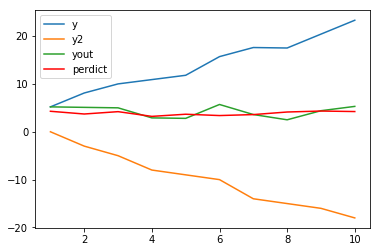

In [109]:

plt.plot(x,y,label="y")
plt.plot(x,y2,label="y2")
plt.plot(x,yout,label="yout")
#plt.plot(x,1.9*x+3.3)
plt.plot(x,model.predict(xin),color="red",label='perdict')
plt.legend()